## Import

In [254]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import itertools
from sklearn.model_selection import StratifiedKFold

## Utils

In [255]:
def plot_training_history(history):
    """
    Plot training and validation loss and accuracy from a model's history, 
    adding the parameters as a title.

    Parameters:
    - history: History object returned by model.fit().
    - params: Dictionary containing the model parameters.
    """

    # Estrai dati dalla history
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history["val_accuracy"]
    
    epochs = range(1, len(train_loss) + 1)  # Numero di epoche

    # Grafico della Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-o', label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Grafico dell'Accuracy
    plt.subplot(1, 2, 2)
    if train_acc:
        plt.plot(epochs, train_acc, 'b-o', label='Training Accuracy')
    if val_acc:
        plt.plot(epochs, val_acc, 'r-o', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    #plt.tight_layout()
    plt.show()

In [256]:
def generate_hyperparameter_combinations(param_ranges):
    """
    Genera tutte le combinazioni di iperparametri basate su range e step specificati.

    :param param_ranges: Dizionario con i nomi degli iperparametri come chiavi.
                         Ogni valore è una tupla (start, stop, step).
    :return: Lista di dizionari con tutte le combinazioni possibili.
    """
    param_values = {
        key: np.arange(start, stop + step, step)
        for key, (start, stop, step) in param_ranges.items()
    }
    
    param_combinations = list(itertools.product(*param_values.values()))
    return [
        dict(zip(param_values.keys(), combination))
        for combination in param_combinations
    ]

In [257]:
def create_hidden_layers(hidden_size, num_layers):
    """
    Crea una tupla per configurare hidden_layer_sizes in base al numero di layer e alla dimensione di ciascun layer.
    
    Parameters:
    - hidden_size (int): Numero di unità per ciascun hidden layer.
    - num_layers (int): Numero di hidden layer.
    
    Returns:
    - tuple: Configurazione per hidden_layer_sizes.
    """
    if num_layers <= 0:
        raise ValueError("Il numero di hidden layer deve essere almeno 1.")
    if hidden_size <= 0:
        raise ValueError("La dimensione degli hidden layer deve essere maggiore di 0.")
    
    return tuple([hidden_size] * num_layers)

## Data load

In [258]:
# One-hot encoding
encoder = OneHotEncoder(categories='auto', sparse_output=False)

# Carica i file di addestramento e test per ciascun dataset dal percorso specificato
monk1_train = pd.read_csv('../Datasets/Monks/monks-1.train', sep='\s+', header=None)
monk1_test = pd.read_csv('../Datasets/Monks/monks-1.test', sep='\s+', header=None)

monk2_train = pd.read_csv('../Datasets/Monks/monks-2.train', sep='\s+', header=None)
monk2_test = pd.read_csv('../Datasets/Monks/monks-2.test', sep='\s+', header=None)

monk3_train = pd.read_csv('../Datasets/Monks/monks-3.train', sep='\s+', header=None)
monk3_test = pd.read_csv('../Datasets/Monks/monks-3.test', sep='\s+', header=None)


# Lista per memorizzare i dataset trasformati
monks_train = []
monks_test = []


# Dataset monk1
X1_train = monk1_train.iloc[:, 1:7].values  # Caratteristiche
y1_train = monk1_train.iloc[:, 0].values    # Etichette

X1_test = monk1_test.iloc[:, 1:7].values
y1_test = monk1_test.iloc[:, 0].values

# Applicazione dell'encoder a monk1
X1_train_encoded = encoder.fit_transform(X1_train)  # Fit e trasformazione sui dati di training
X1_test_encoded = encoder.transform(X1_test)        # Solo trasformazione sui dati di test

monks_train.append((X1_train_encoded, y1_train))
monks_test.append((X1_test_encoded, y1_test))

# Dataset monk2
X2_train = monk2_train.iloc[:, 1:7].values
y2_train = monk2_train.iloc[:, 0].values

X2_test = monk2_test.iloc[:, 1:7].values
y2_test = monk2_test.iloc[:, 0].values

# Applicazione dell'encoder a monk2
X2_train_encoded = encoder.fit_transform(X2_train)
X2_test_encoded = encoder.transform(X2_test)

monks_train.append((X2_train_encoded, y2_train))
monks_test.append((X2_test_encoded, y2_test))

# Dataset monk3
X3_train = monk3_train.iloc[:, 1:7].values
y3_train = monk3_train.iloc[:, 0].values

X3_test = monk3_test.iloc[:, 1:7].values
y3_test = monk3_test.iloc[:, 0].values

# Applicazione dell'encoder a monk3
X3_train_encoded = encoder.fit_transform(X3_train)
X3_test_encoded = encoder.transform(X3_test)

monks_train.append((X3_train_encoded, y3_train))
monks_test.append((X3_test_encoded, y3_test))

## Model creation

In [259]:
def create_nn(activ_type = 'tanh', optim_type = 'sgd', reg_flag = False, learning_rate=0.01,
              hidden_size=6, hidden_layers=1, regularization=0.01, momentum=0.9):
    
    
    
    tuple_hidden_layers = create_hidden_layers(hidden_size, hidden_layers)

    if reg_flag:
        model = MLPClassifier(hidden_layer_sizes=tuple_hidden_layers, activation=activ_type,
                    solver=optim_type, alpha=regularization, learning_rate_init=learning_rate, 
                    learning_rate='adaptive', momentum=momentum, nesterovs_momentum=True, max_iter=1,
                    warm_start=False, random_state=42)
        
    else:
        model = MLPClassifier(hidden_layer_sizes=tuple_hidden_layers, activation=activ_type,
                    solver=optim_type, alpha=0, learning_rate_init=learning_rate, 
                    learning_rate='adaptive', momentum=momentum, nesterovs_momentum=True, max_iter=1,
                    warm_start=False, random_state=42)

    return model

In [260]:
def fit(model: MLPClassifier, X_train, y_train, X_test, y_test, epochs=100, batch_size=1, patience=5):

    history = {
    "loss": [],
    "val_loss": [],
    "accuracy": [],
    "val_accuracy": []
    }

    best_val_acc = np.inf
    best_model = None
    epochs_without_improvement = 0

    # Training manuale per epoche
    for epoch in range(epochs):
        # Shuffling dei dati per ogni epoca
        indices = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        
        # Addestriamo il modello in minibatch
        for start_idx in range(0, len(X1_train_encoded), batch_size):
            end_idx = start_idx + batch_size
            if start_idx >= len(X_train_shuffled):  # Non permettere di creare batch vuoti
                break
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]
            model.partial_fit(X_batch, y_batch, classes=np.array([0, 1]))
        
        # Monitoraggio delle metriche
        history["loss"].append(model.loss_)
        history["accuracy"].append(accuracy_score(y_train, model.predict(X_train)))
        val_acc = accuracy_score(y_test, model.predict(X_test))
        history["val_accuracy"].append(val_acc)

        # Calcolo della validation loss manualmente
        val_loss = np.mean((model.predict_proba(X_test) - np.eye(len(np.unique(y_test)))[y_test])**2)
        history["val_loss"].append(val_loss)

        # Early Stopping Check
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model  # Salva il modello migliore
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # Interrompi se il modello non migliora per `patience` epoche consecutive
        if epochs_without_improvement >= patience:
            break


    return best_model, history

In [261]:
def k_fold_cross_validation(data, labels,  activ_type = 'tanh', optim_type = 'sgd', reg_flag = False, params=None):
    # Configurazione della k-fold cross-validation
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 4. Ciclo di cross-validation
    fold_no = 1
    accuracy_per_fold = []
    for train_index, val_index in kfold.split(data, labels):
        
        # Suddivisione del dataset
        X_train, X_val = data[train_index], data[val_index]
        y_train, y_val = labels[train_index], labels[val_index]


        # Creazione della rete neurale
        model = create_nn(activ_type = activ_type,
                            optim_type = optim_type,
                            reg_flag = reg_flag,
                            learning_rate=params['learning_rate'], 
                            hidden_size=params['hidden_size'], 
                            hidden_layers=params['hidden_layers'], 
                            regularization=params['regularization'], 
                            momentum=params['momentum'])


        # Addestramento con EarlyStopping
        model, history = fit(model, X_train, y_train,
                            X_val, y_val,
                            epochs=params['epochs'],
                            batch_size=params['batch_size'],
                            patience=params['patience'])

        # Prendi il miglior score (l'accuratezza di validazione massima)
        score = max(history['val_accuracy'])
        accuracy_per_fold.append(score)    
        fold_no += 1

    avg_score = np.mean(accuracy_per_fold)


    X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

    # Creazione della rete neurale
    model = create_nn(activ_type = activ_type,
                        optim_type = optim_type,
                        reg_flag = reg_flag,
                        learning_rate=params['learning_rate'], 
                        hidden_size=params['hidden_size'], 
                        hidden_layers=params['hidden_layers'], 
                        regularization=params['regularization'], 
                        momentum=params['momentum'])


    # Addestramento con EarlyStopping
    model, history = fit(model, X_train, y_train,
                        X_val, y_val,
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        patience=params['patience'])

    return avg_score, history, model

## Greedy search

In [262]:
def greed_search(data, labels, activ_type = 'tanh', optim_type = 'sgd', reg_flag = False, param_grid = None):
    
    best_scores = []  # Usa una lista normale per memorizzare i punteggi
    best_params_list = []  # Lista per le configurazioni
    best_models = []  # Lista per i modelli
    best_histories = []  # Lista per la cronologia

    for params in param_grid:
        print("--------------------------------------------------")
        print(f"Testing params: {params}")
        score, history, model = k_fold_cross_validation(data, labels, activ_type, optim_type, reg_flag, params=params)
        print(f"Score : {score}")

        # Aggiungi i risultati alla lista
        best_scores.append(score)
        best_params_list.append(params)
        best_models.append(model)
        best_histories.append(history)

        # Ordina la lista dei punteggi e mantieni solo i migliori 10
        sorted_indices = np.argsort(best_scores)[::-1]  # Ordina i punteggi in ordine decrescente
        best_scores = [best_scores[i] for i in sorted_indices][:10]  # Usa la lista e mantieni i top 10
        best_params_list = [best_params_list[i] for i in sorted_indices][:10]
        best_models = [best_models[i] for i in sorted_indices][:10]
        best_histories = [best_histories[i] for i in sorted_indices][:10]

    print("--------------------END GREED SEARCH------------------------------")

    # Ora hai i 10 migliori risultati
    # print("Top 10 best scores:")
    #print(best_scores)
    #print("Top 10 best params:")
    #print(best_params_list)

    return best_scores, best_params_list, best_models, best_histories

## Model selection

In [263]:
best_scores = [[], [], []]  # Usa una lista di tre elementi per memorizzare i punteggi
best_params_list = [[], [], []]  # Lista di tre elementi per le configurazioni
best_models = [[], [], []]  # Lista di tre elementi per i modelli
best_histories = [[], [], []]  # Lista di tre elementi per la storia di allenamento

# Seleziona 100 elementi a caso senza rimpiazzamento
#np.random.choice(param_grid, size=100, replace=False)

--------------------------------------------------MONK 1--------------------------------------------------
--------------------------------------------------
Testing params: {'learning_rate': 0.3, 'epochs': 340, 'batch_size': 16, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.6, 'regularization': 0.001, 'patience': 30}
Score : 0.782
--------------------------------------------------
Testing params: {'learning_rate': 0.4, 'epochs': 340, 'batch_size': 16, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.6, 'regularization': 0.001, 'patience': 30}
Score : 0.8546666666666667
--------------------END GREED SEARCH------------------------------
--------------------------------------------------Plots--------------------------------------------------
{'learning_rate': 0.4, 'epochs': 340, 'batch_size': 16, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.6, 'regularization': 0.001, 'patience': 30}
Score: 0.8546666666666667


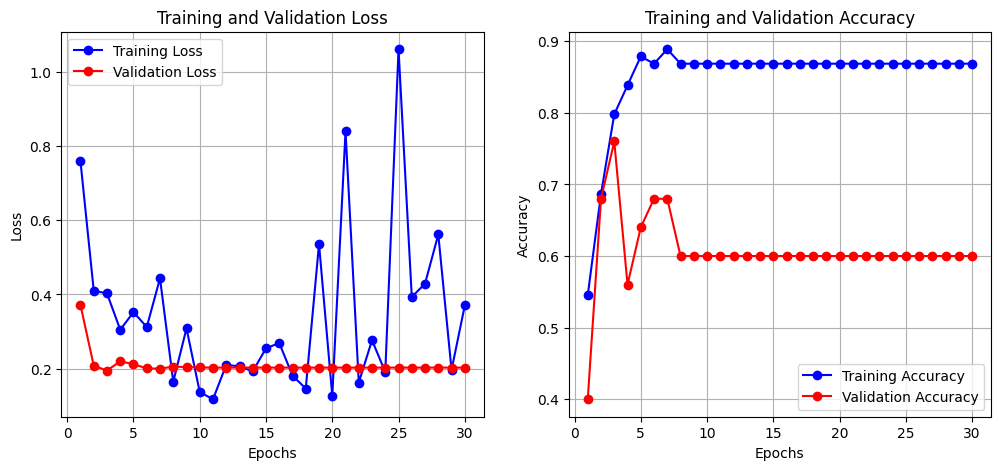

{'learning_rate': 0.3, 'epochs': 340, 'batch_size': 16, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.6, 'regularization': 0.001, 'patience': 30}
Score: 0.782


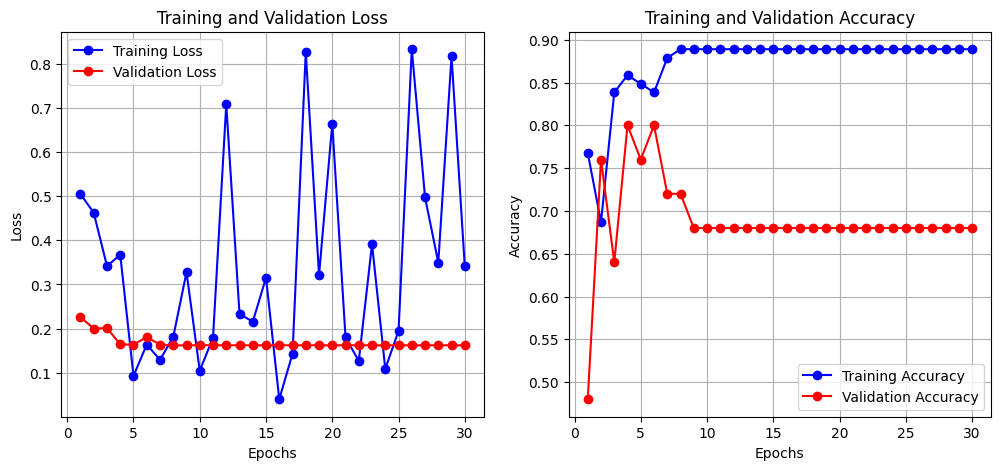

In [264]:
# Definizione dei range degli iperparametri
param_ranges_1 = {
    "learning_rate": (0.3, 0.3, 0.1),  # Da 0.01 a 0.5 con step di 0.05
    "epochs": (340, 340, 1),                   # Da 0 a 10 con step di 1
    "batch_size": (16, 16, 1),             # Da 8 a 32 con step di 8
    "hidden_size": (3, 3, 1),           # Da 32 a 128 con step di 32
    "hidden_layers": (1, 1, 1),             # Da 1 a 3 con step di 1
    "momentum": (0.6, 0.6, 0.1),          # Da 0.9 a 0.99 con step di 0.01
    "regularization": (0.001, 0.001, 0.005),             # Da 0.0 a 0.1 con step di 0.05
    "patience": (30, 30, 1)            # Da 5 a 15 con step di 5
}

param_grid_monk1 = []
param_grid_monk1 = generate_hyperparameter_combinations(param_ranges_1)


print("--------------------------------------------------MONK 1--------------------------------------------------")
best_scores[0], best_params_list[0], best_models[0], best_histories[0] = greed_search(X1_train_encoded, y1_train, 
                                                                                      'tanh', 'sgd', False, 
                                                                                      param_grid_monk1)

print("--------------------------------------------------Plots--------------------------------------------------")
for i, (history, params, score) in enumerate(zip(best_histories[0], best_params_list[0], best_scores[0])):
    print(f"{params}")
    print(f"Score: {score}")
    plot_training_history(history)

In [265]:
# Definizione dei range degli iperparametri
param_ranges_2 = {
    "learning_rate": (0.4, 0.9, 0.1),  # Da 0.01 a 0.5 con step di 0.05
    "epochs": (180, 180, 1),                   # Da 0 a 10 con step di 1
    "batch_size": (4, 16, 6),             # Da 8 a 32 con step di 8
    "hidden_size": (3, 3, 1),           # Da 32 a 128 con step di 32
    "hidden_layers": (1, 1, 1),             # Da 1 a 3 con step di 1
    "momentum": (0.3, 0.6, 0.1),          # Da 0.9 a 0.99 con step di 0.01
    "regularization": (0.001, 0.001, 0.005),             # Da 0.0 a 0.1 con step di 0.05
    "patience": (30, 30, 1)            # Da 5 a 15 con step di 5
}

param_grid_monk2 = []
param_grid_monk2 = generate_hyperparameter_combinations(param_ranges_2)



print("--------------------------------------------------MONK 2--------------------------------------------------")
best_scores[1], best_params_list[1], best_models[1], best_histories[1] = greed_search(X2_train_encoded, y2_train,
                                                                                      'tanh', 'sgd', False, 
                                                                                       param_grid_monk2)

print("--------------------------------------------------Plots--------------------------------------------------")
for i, (history, params, score) in enumerate(zip(best_histories[1], best_params_list[1], best_scores[1])):
    print(f"{params}")
    print(f"Score: {score}")
    plot_training_history(history)

--------------------------------------------------MONK 2--------------------------------------------------
--------------------------------------------------
Testing params: {'learning_rate': 0.4, 'epochs': 180, 'batch_size': 4, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.3, 'regularization': 0.001, 'patience': 30}
Score : 0.6153297682709448
--------------------------------------------------
Testing params: {'learning_rate': 0.4, 'epochs': 180, 'batch_size': 4, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.4, 'regularization': 0.001, 'patience': 30}
Score : 0.5729055258467024
--------------------------------------------------
Testing params: {'learning_rate': 0.4, 'epochs': 180, 'batch_size': 4, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.5, 'regularization': 0.001, 'patience': 30}


KeyboardInterrupt: 

--------------------------------------------------MONK 3--------------------------------------------------
--------------------------------------------------
Testing params: {'learning_rate': 0.1, 'epochs': 180, 'batch_size': 4, 'hidden_size': 2, 'hidden_layers': 1, 'momentum': 0.3, 'regularization': 0.1, 'alpha': 0.01, 'patience': 30}
Score : 0.598
--------------------------------------------------
Testing params: {'learning_rate': 0.1, 'epochs': 180, 'batch_size': 4, 'hidden_size': 2, 'hidden_layers': 1, 'momentum': 0.3, 'regularization': 0.30000000000000004, 'alpha': 0.01, 'patience': 30}
Score : 0.5496666666666667
--------------------------------------------------
Testing params: {'learning_rate': 0.1, 'epochs': 180, 'batch_size': 4, 'hidden_size': 2, 'hidden_layers': 1, 'momentum': 0.3, 'regularization': 0.5000000000000001, 'alpha': 0.01, 'patience': 30}
Score : 0.599
--------------------------------------------------
Testing params: {'learning_rate': 0.1, 'epochs': 180, 'batch_si

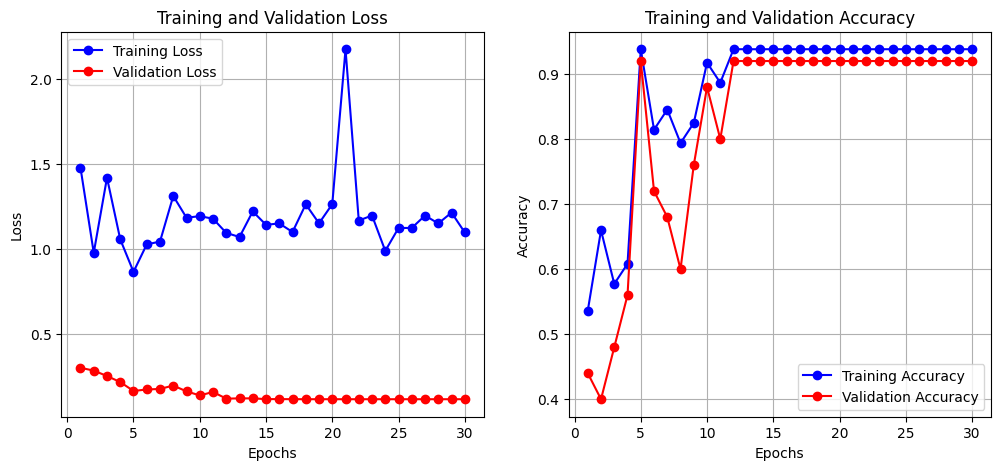

{'learning_rate': 0.4, 'epochs': 180, 'batch_size': 16, 'hidden_size': 2, 'hidden_layers': 1, 'momentum': 0.3, 'regularization': 0.30000000000000004, 'alpha': 0.01, 'patience': 30}
Score: 0.9426666666666665


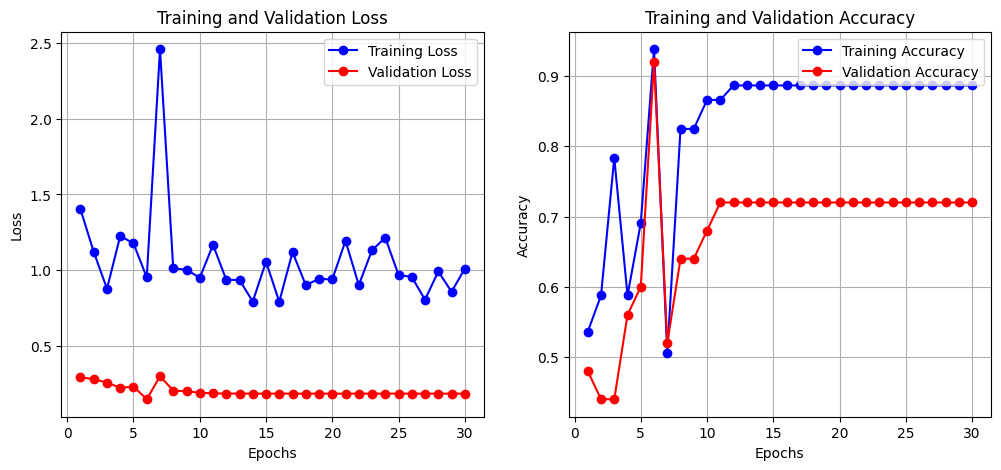

{'learning_rate': 0.30000000000000004, 'epochs': 180, 'batch_size': 16, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.6000000000000001, 'regularization': 0.30000000000000004, 'alpha': 0.01, 'patience': 30}
Score: 0.9426666666666665


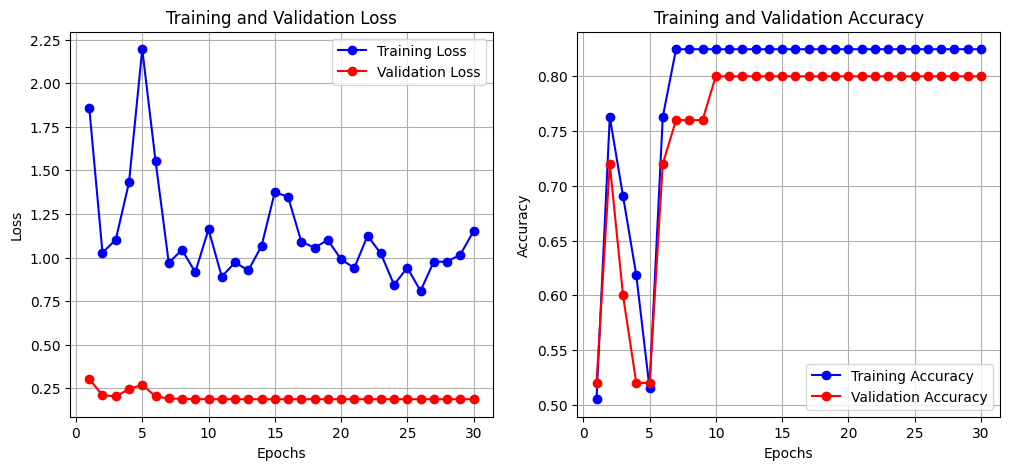

{'learning_rate': 0.1, 'epochs': 180, 'batch_size': 4, 'hidden_size': 2, 'hidden_layers': 1, 'momentum': 0.9000000000000001, 'regularization': 0.1, 'alpha': 0.01, 'patience': 30}
Score: 0.9426666666666665


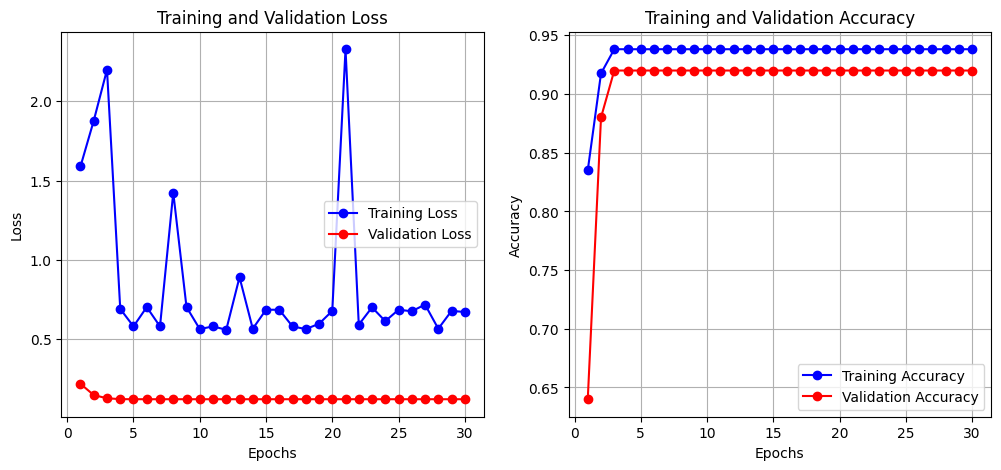

{'learning_rate': 0.4, 'epochs': 180, 'batch_size': 10, 'hidden_size': 2, 'hidden_layers': 1, 'momentum': 0.8000000000000003, 'regularization': 0.30000000000000004, 'alpha': 0.01, 'patience': 30}
Score: 0.9426666666666665


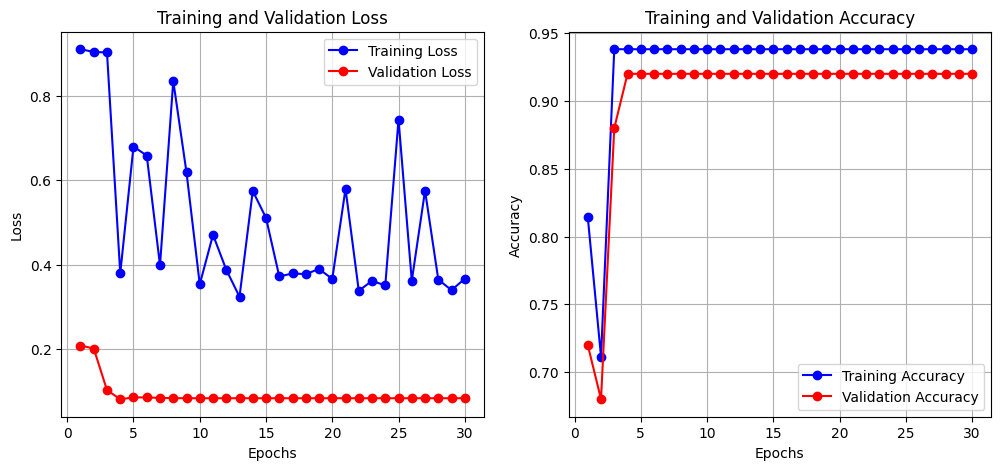

{'learning_rate': 0.30000000000000004, 'epochs': 180, 'batch_size': 10, 'hidden_size': 2, 'hidden_layers': 1, 'momentum': 0.9000000000000001, 'regularization': 0.30000000000000004, 'alpha': 0.01, 'patience': 30}
Score: 0.9423333333333334


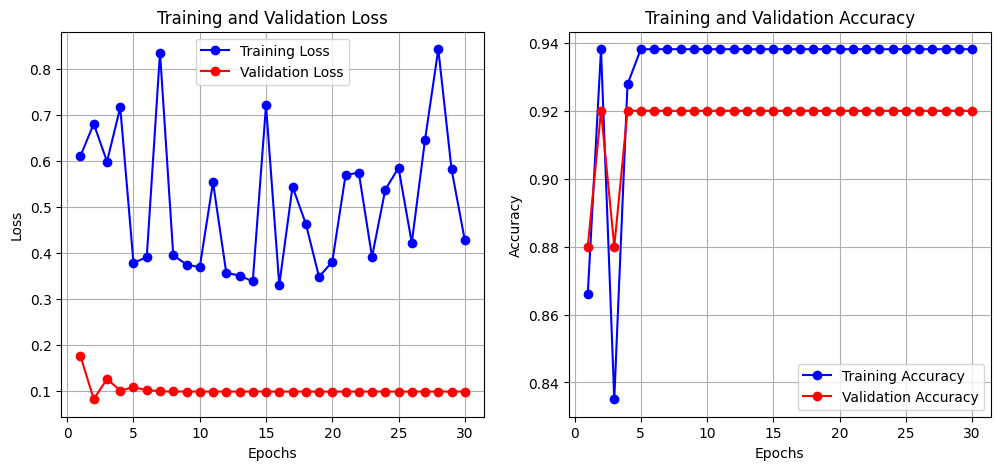

{'learning_rate': 0.2, 'epochs': 180, 'batch_size': 16, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.8000000000000003, 'regularization': 0.1, 'alpha': 0.01, 'patience': 30}
Score: 0.9423333333333334


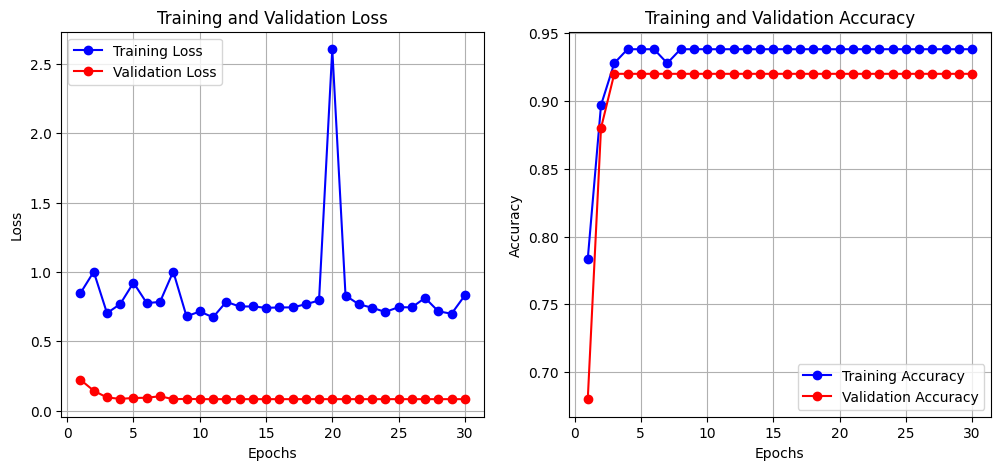

{'learning_rate': 0.4, 'epochs': 180, 'batch_size': 10, 'hidden_size': 2, 'hidden_layers': 1, 'momentum': 0.9000000000000001, 'regularization': 0.1, 'alpha': 0.01, 'patience': 30}
Score: 0.9423333333333334


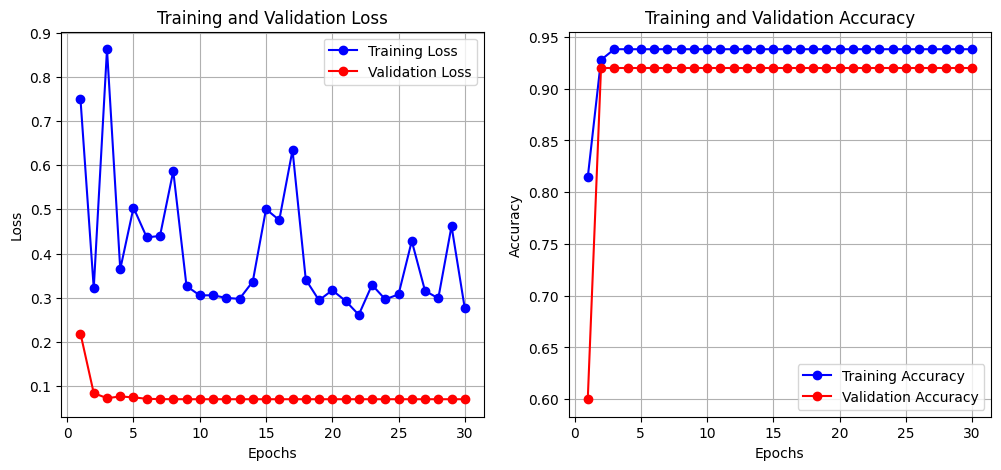

{'learning_rate': 0.4, 'epochs': 180, 'batch_size': 10, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.8000000000000003, 'regularization': 0.1, 'alpha': 0.01, 'patience': 30}
Score: 0.9423333333333334


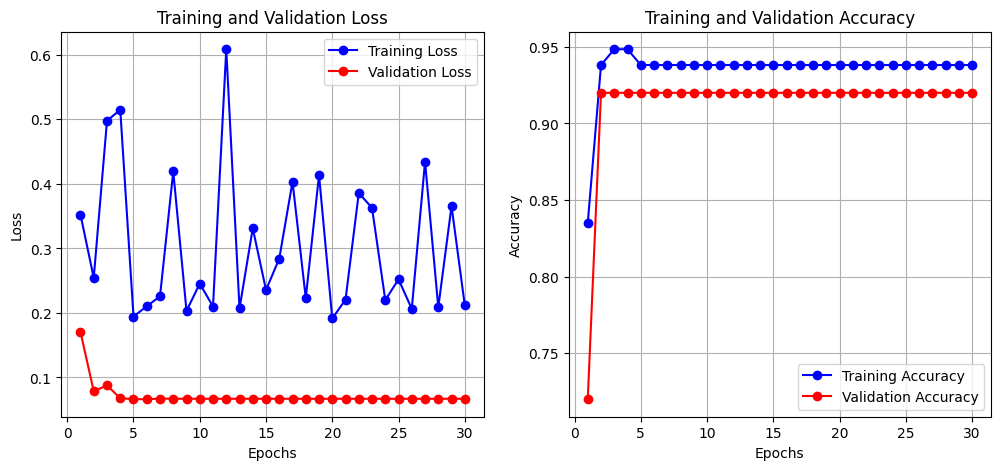

{'learning_rate': 0.4, 'epochs': 180, 'batch_size': 16, 'hidden_size': 3, 'hidden_layers': 1, 'momentum': 0.4, 'regularization': 0.1, 'alpha': 0.01, 'patience': 30}
Score: 0.9423333333333334


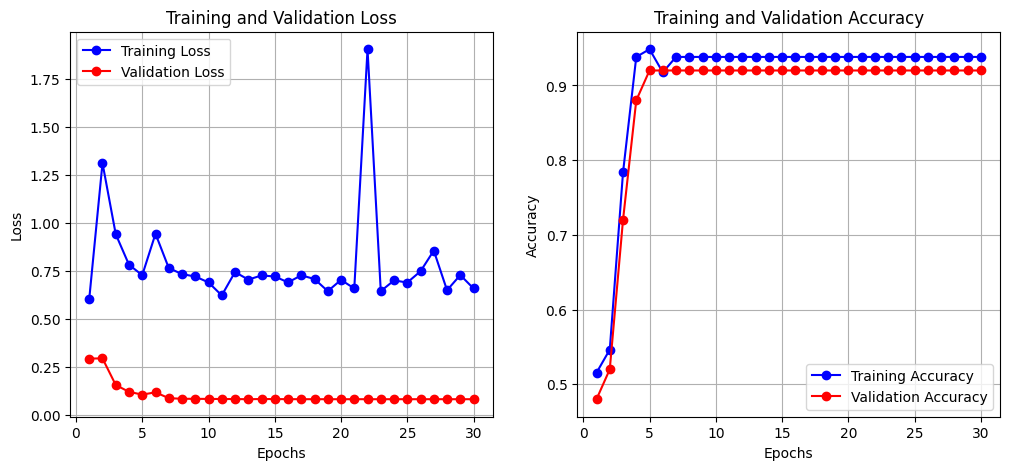

In [ ]:
# Definizione dei range degli iperparametri
param_ranges_3 = {
    "learning_rate": (0.1, 0.4, 0.1),  # Da 0.01 a 0.5 con step di 0.05
    "epochs": (180, 180, 1),                   # Da 0 a 10 con step di 1
    "batch_size": (4, 16, 6),             # Da 8 a 32 con step di 8
    "hidden_size": (2, 3, 1),           # Da 32 a 128 con step di 32
    "hidden_layers": (1, 1, 1),             # Da 1 a 3 con step di 1
    "momentum": (0.3, 0.9, 0.1),          # Da 0.9 a 0.99 con step di 0.01
    "regularization": (0.1, 0.4, 0.2),             # Da 0.0 a 0.1 con step di 0.05
    "alpha": (0.01, 0.01, 0.01),             # Da 0.01 a 0.1 con step di 0.05
    "patience": (30, 30, 1)            # Da 5 a 15 con step di 5
}

param_grid_monk3 = []
param_grid_monk3 = generate_hyperparameter_combinations(param_ranges_3)

print("--------------------------------------------------MONK 3--------------------------------------------------")
best_scores[2], best_params_list[2], best_models[2], best_histories[2] = param_grid = greed_search(X3_train_encoded, y3_train,
                                                                                                   'tanh', 'sgd', True, 
                                                                                                   param_grid_monk3)

print("--------------------------------------------------Plots--------------------------------------------------")
for i, (history, params, score) in enumerate(zip(best_histories[2], best_params_list[2], best_scores[2])):
    print(f"{params}")
    print(f"Score: {score}")
    plot_training_history(history)